<a href="https://colab.research.google.com/github/gguillaux/fiap-bootcamp-vivante/blob/master/squalio_vivante_bootcamp_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Carregar repositório atualizado

In [1]:
# !rm -r fiap-bootcamp-vivante
!git clone https://github.com/gguillaux/fiap-bootcamp-vivante.git

fatal: destination path 'fiap-bootcamp-vivante' already exists and is not an empty directory.


In [2]:
!ls fiap-bootcamp-vivante/dataset

db_ordem_servico_busca_complexa.xlsx  db_roteiros_busca_simples.xlsx
db_os_geral.xlsx		      db_tecnicos.xlsx


# 2. Importar bibliotecas

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
os.chdir('fiap-bootcamp-vivante/dataset')

# 3. Validação superficial dos dados

In [5]:
pd.read_excel('db_ordem_servico_busca_complexa.xlsx').head(3).T

,0,1,2
Número OS,0,204472,215523
Denominação OS,DDS (DIÁLOGO DIÁRIO DE SEGURANÇA),TREINAMENTO SEMESTRAL (QGBT'S - OPERAÇÃO E MAN...,PIA VAZANDO
Ativo,HMBHPA1SSSRE03,HMEB-ELE.T004,HMBHPA1PVWC014
Descrição Ativo,SALA DE REUNIÃO VIVANTE,TREINAMENTO SEMESTRAL (QGBT'S - OPERAÇÃO E MAN...,SANITÁRIO FEMININO SALA DE AULA 01
Estado OS,FC,FC,FC
Denominação Estado OS,Fechada,Fechada,Fechada
Classe de Trabalho,TRT,PRS,COR
Descrição Classe de Trabalho,TREINAMENTO,PREVENTIVA SISTEMÁTICA,CORRETIVA EMERGÊNCIAL
Atividade,TRT,TRT,HIDR
Descrição Atividade,TREINAMENTOS,TREINAMENTOS,HIDRAULICA


In [6]:
pd.read_excel('db_os_geral.xlsx').head().head(5).T

,0,1,2,3,4
NUM_OS,204472,247489,247490,247491,247492
Ativo,HMEB-ELE.T004,1E01,1E01,1E02,1E02
Descrição Ativo,TREINAMENTO SEMESTRAL (QGBT'S - OPERAÇÃO E MAN...,ESFIGMOMANOMETRO DE PEDESTAL - 608902-N/A,ESFIGMOMANOMETRO DE PEDESTAL - 608902-N/A,ESFIGMOMANOMETRO DE PEDESTAL - 611223-N/A,ESFIGMOMANOMETRO DE PEDESTAL - 611223-N/A
Classe de equipamento,GADM,ESFIP,ESFIP,ESFIP,ESFIP
Descrição Classe de equipamento,GERÊNCIA E ADMINISTRACAO,ESFIGMOMANOMETRO DE PEDESTAL,ESFIGMOMANOMETRO DE PEDESTAL,ESFIGMOMANOMETRO DE PEDESTAL,ESFIGMOMANOMETRO DE PEDESTAL
company,HMEB,HMEB,HMEB,HMEB,HMEB
completionScheduled,NaN,NaN,NaN,NaN,NaN
Solicitante_OS,DB210893,DB210893,DB210893,DB210893,DB210893
DENOM_OS,TREINAMENTO SEMESTRAL (QGBT'S - OPERAÇÃO E MAN...,INTERVENÇAO CRITICA ENGENHARIA CLINICA ANUAL C...,PREVENTIVA DE ENGENHARIA CLINICA SEMESTRAL - ...,INTERVENÇAO CRITICA ENGENHARIA CLINICA ANUAL C...,PREVENTIVA DE ENGENHARIA CLINICA SEMESTRAL - ...
ESTADO_OS,Fechada,Fechada,Fechada,Fechada,Fechada


In [7]:
pd.read_excel('db_roteiros_busca_simples.xlsx').head().head(3).T

,0,1,2
Roteiro,AUT.T001.12,AUT.T002.06,AUT.T003.12
Denominação de Roteiro,TREINAMENTO ANUAL (OPERACIONAL DO SISTEMA DE A...,TREINAMENTO SEMESTRAL (ROTINAS OPERACIONAIS DE...,TREINAMENTO ANUAL (OPERACIONAL DO SISTEMA DE A...
Tempo de Parada Previsto,4,4,4
Atividade,TRT,TRT,TRT
Descrição Atividade,TREINAMENTOS,TREINAMENTOS,TREINAMENTOS
Classe de Trabalho,PRS,PRS,PRS
Descrição Classe de Trabalho,PREVENTIVA SISTEMÁTICA,PREVENTIVA SISTEMÁTICA,PREVENTIVA SISTEMÁTICA


In [8]:
pd.read_excel('db_tecnicos.xlsx').head().head(3).T

,0,1,2
cod_tecn,VB103689,VB104104,VB104104
nome_tecn,ITALO LINEU SILVEIRA RODRIGUES,JOSELUCIO ROSA DE ANDRADE,JOSELUCIO ROSA DE ANDRADE
status_tecn,OP,OP,OP
espec_tecn,MREF,HIDR,HIDR
denom_espec_tecn,MECÂNICA E REFRIGERAÇÃO,HIDRAULICA,HIDRAULICA
escala,12X36,5X2,5X2
data_apont_tecn,2020-01-01 00:00:00.000,2020-01-01 00:00:00.000,2020-01-01 00:00:00.000
OS_trabalhada,249866,248165,248195
tempo_trabalhado,00:30:00,00:24:00,00:43:00
tempo_real_mes,1900-01-06 14:00:00,1900-01-07 20:30:00,1900-01-07 20:30:00


# 4. Limpeza dos dataframes

In [9]:
def convert_to_col_type(df, df_columns, col_type):
    for col in df_columns:
        df[col] = df[col].astype(col_type)
    return df

In [10]:
# carrega os_geral e limpa tipos de dados
colunas_com_datas = ['DATA_CRIACAO', 'DATA_VL', 'DATA_CO', 'Data_Real', 'ABERTURA_OS', 'PREV_ATENDIMENTO', 'completionScheduled']
os_geral = pd.read_excel('db_os_geral.xlsx', parse_dates=colunas_com_datas)
os_geral.columns = [c.upper() for c in os_geral.columns]
os_geral['TP_OS'] = 'GERAL'

# convert categorical columns to categorical
colunas_categoricas = ['ATIVIDADE', 'DENOM_CLASSE_TRAB', 'ESTADO_OS', 'ASSETNAME', 'ESTADO_OS', 'DESCRIÇÃO CLASSE DE EQUIPAMENTO', 'UNIDADE_NEGOCIO', 'TP_OS']
os_geral = convert_to_col_type(os_geral, colunas_categoricas, 'category')

# select just columns to be used
cols = ['NUM_OS', 'ESTADO_OS', 'TP_OS', 'DENOM_OS', 'DENOM_CLASSE_TRAB', 'DATA_REAL', 'DATA_CRIACAO', 'ABERTURA_OS', 'PREV_ATENDIMENTO', 'DATA_CO',
        'ASSETNAME', 'UNIDADE_NEGOCIO', 'ATIVIDADE', 'DESCRIÇÃO CLASSE DE EQUIPAMENTO']
df_geral = os_geral[cols]

In [11]:
# filtra somente os ja concluidas e remove linhas com valores nules em alguma coluna
os_em_aberto = df_geral['DATA_CO'].isna()
df_geral_concluidas = df_geral[~os_em_aberto].dropna()

# ajusta tipos de dados pendetes
df_geral_concluidas = convert_to_col_type(df_geral_concluidas, ['DATA_REAL', 'PREV_ATENDIMENTO', 'DATA_CO'], 'datetime64[ns]')

In [12]:
# calcula, em minutos, quanto tempo cada tarefa demorou para ser executada
df_geral_concluidas['EXEC_TIME'] = (df_geral_concluidas['DATA_CO'] - df_geral_concluidas['DATA_REAL'])
df_geral_concluidas['EXEC_TIME'] = df_geral_concluidas['EXEC_TIME'].apply(lambda x: x.total_seconds() / 60)

# 5. Histogramas das durações de cada classe de trabalho da OS_GERAL

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


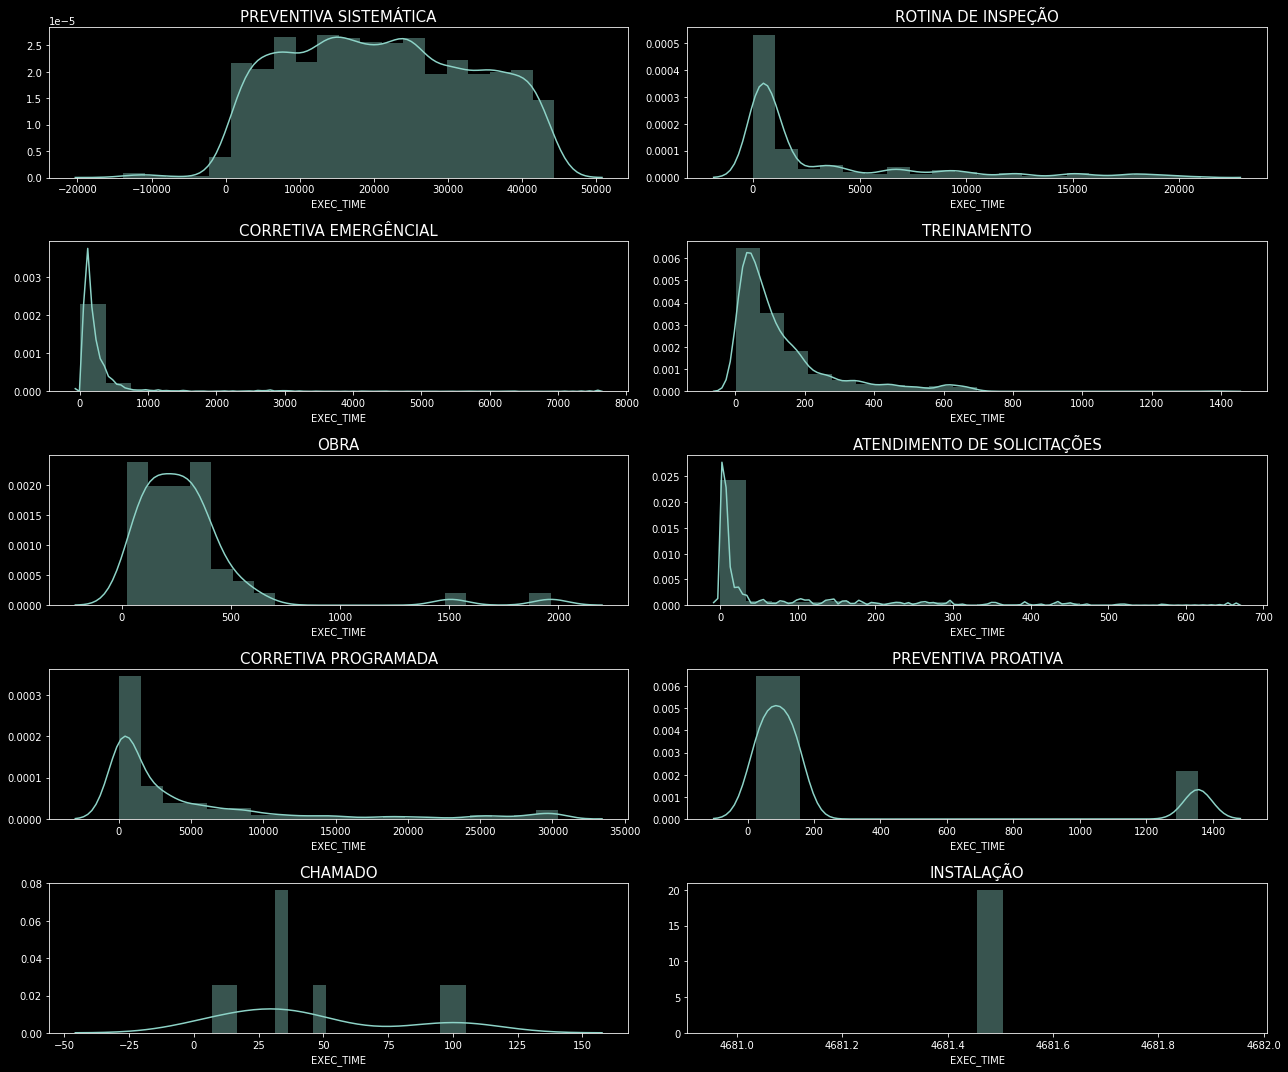

In [13]:
plt.style.use('dark_background')
fig, ax = plt.subplots(5, 2, figsize=(18, 15))

for i, classe in enumerate(df_geral_concluidas.DENOM_CLASSE_TRAB.unique()):
    r = i // 2
    c = i % 2
    aux = df_geral_concluidas[df_geral_concluidas['DENOM_CLASSE_TRAB'] == classe]['EXEC_TIME']
    # plot ate o percentil 96, para evitar outliers
    std = np.std(aux)
    filtro = np.mean(aux) + (std * 1.5)
    _ = sns.distplot(aux[aux <= filtro], ax=ax[r, c], bins=20)
    ax[r, c].set_title(classe, fontsize=15)

fig.tight_layout()
plt.show()

# 6. Modelagem do Algoritmo de Regressão

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [62]:
rm_cols = [c for c in df_geral_concluidas.columns if c not in ('DATA_REAL', 'DATA_CRIACAO', 'ABERTURA_OS', 'PREV_ATENDIMENTO', 'DATA_CO', 'ESTADO_OS', 'DENOM_OS')]

In [130]:
# calculo do desvio padrao do tempo gasto para execucao de cada os
std = np.std(df_geral_concluidas['EXEC_TIME']) * 1.5
media = np.mean(df_geral_concluidas['EXEC_TIME'])

# remove outliers da base de dados principal, removendo dados 1.5 desvio padrao da media
filtro = (df_geral_concluidas['EXEC_TIME'] <= (media) + std) & (df_geral_concluidas['EXEC_TIME'] >= (media) - std)
df_std = df_geral_concluidas[filtro]


# aplica one-hot enconding para deixar a base pronta para treinamento
cols_para_treino = ['DENOM_CLASSE_TRAB', 'ATIVIDADE', 'DESCRIÇÃO CLASSE DE EQUIPAMENTO', 'EXEC_TIME']
df_aux = df_std[cols_para_treino]
df = pd.get_dummies(df_aux)

# valida o numero total de dimensoes do dataset
print(df.shape)

(23189, 114)


In [131]:
# divide conjuntos de treinamento e teste
y = df['EXEC_TIME']
X = df.drop('EXEC_TIME', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [18]:
# validacao de melhor valor de depth para arvore de decisao
for x in range(5, 26):
    dt = DecisionTreeRegressor(max_depth=x, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('RMSE = {} \tDEPTH = {}'.format(rmse, x))

RMSE = 5188.127743162354 	DEPTH = 5
RMSE = 5168.8582125721505 	DEPTH = 6
RMSE = 5152.512623354832 	DEPTH = 7
RMSE = 5141.81256820408 	DEPTH = 8
RMSE = 5128.531177075535 	DEPTH = 9
RMSE = 5122.318350671635 	DEPTH = 10
RMSE = 5119.629139282793 	DEPTH = 11
RMSE = 5113.963145569213 	DEPTH = 12
RMSE = 5110.869794119401 	DEPTH = 13
RMSE = 5104.576468695583 	DEPTH = 14
RMSE = 5106.561296981265 	DEPTH = 15
RMSE = 5105.926714682399 	DEPTH = 16
RMSE = 5099.650744299957 	DEPTH = 17
RMSE = 5099.26923157287 	DEPTH = 18
RMSE = 5093.266100722131 	DEPTH = 19
RMSE = 5091.763607530809 	DEPTH = 20
RMSE = 5091.491353706119 	DEPTH = 21
RMSE = 5091.39664686754 	DEPTH = 22
RMSE = 5091.54368135302 	DEPTH = 23
RMSE = 5087.878020243305 	DEPTH = 24
RMSE = 5089.400619171476 	DEPTH = 25


In [19]:
# validacao de melhor random forest
for x in range(5, 26):
    dt = RandomForestRegressor(max_depth=x, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('RMSE = {} \tDEPTH = {}'.format(rmse, x))

RMSE = 5166.365441027028 	DEPTH = 5
RMSE = 5143.6074994238315 	DEPTH = 6
RMSE = 5124.550138575193 	DEPTH = 7
RMSE = 5116.570835280644 	DEPTH = 8
RMSE = 5105.024142541122 	DEPTH = 9
RMSE = 5097.693078651948 	DEPTH = 10
RMSE = 5091.101837349828 	DEPTH = 11
RMSE = 5085.730252887498 	DEPTH = 12
RMSE = 5081.593144604423 	DEPTH = 13
RMSE = 5078.184153970398 	DEPTH = 14
RMSE = 5075.064674188266 	DEPTH = 15
RMSE = 5072.89965645063 	DEPTH = 16
RMSE = 5071.443586126638 	DEPTH = 17
RMSE = 5071.110581957682 	DEPTH = 18
RMSE = 5070.110309432846 	DEPTH = 19
RMSE = 5068.919789482068 	DEPTH = 20
RMSE = 5068.631965613041 	DEPTH = 21
RMSE = 5068.092697165711 	DEPTH = 22
RMSE = 5067.318802982569 	DEPTH = 23
RMSE = 5067.314710689639 	DEPTH = 24
RMSE = 5066.882247367588 	DEPTH = 25


In [22]:
# valida comparacao de modelos de regressao
models = {'linear' : LinearRegression(),
          'decision_tree': DecisionTreeRegressor(max_depth=23),
          'random_forest': RandomForestRegressor(max_depth=20, random_state=42)}

In [23]:
def validate_models(aux_dict, target_model):
    model = aux_dict.get(target_model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MODEL = {}\t RMSE = {}'.format(target_model, rmse))

In [24]:
# valida o RMSE para decidir qual modelo usar na nossa API
for regressor in models:
    validate_models(models, regressor)

MODEL = linear	 RMSE = 12500138930197.8
MODEL = decision_tree	 RMSE = 5091.54368135302
MODEL = random_forest	 RMSE = 5068.919789482068


# 7. Modelagem do Classificador de Prioridades

In [139]:
# prepara df base
cols_para_treino = ['DENOM_OS', 'DENOM_CLASSE_TRAB', 'ATIVIDADE', 'DESCRIÇÃO CLASSE DE EQUIPAMENTO']
df_aux = df_std[cols_para_treino]

In [140]:
def tarefa_critica(desc):
    '''VALIDA SE A DESCRICAO DA OS E CRITICA'''

    palavras_chave = ['CRITI', 'EMERG', 'QUEBR', 'VAZAMEN']
    for palavra in palavras_chave:
        if palavra in desc:
            return True
    return False       



def classifica_prioridade(row):
    '''CLASSIFICA A PRIORIDADE DE CADA OS'''

    if tarefa_critica(row['DENOM_OS']):
        return '1-HIGH'
    elif row['DENOM_CLASSE_TRAB'] in ('CORRETIVA EMERGÊNCIAL', 'CHAMADO'):
        return '2-MEDIUM'
    else:
        return '3-LOW'

In [141]:
# cria feature de prioridade, usando palavras chaves e outros criterios / regras de negocio
df_aux['PRIORIDADE'] = df_aux.apply(lambda x: classifica_prioridade(x), axis=1)

# valida se a feature criada eh consistente
print(df_aux.PRIORIDADE.value_counts(), '\n\n')

3-LOW       13168
2-MEDIUM     9193
1-HIGH        828
Name: PRIORIDADE, dtype: int64 




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [143]:
y = pd.get_dummies(df_aux['PRIORIDADE'])
X = pd.get_dummies(df_aux.drop('PRIORIDADE', axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [144]:
# valida acuracia do KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9976282880551962


In [145]:
# valida acuracia do random forest
for x in range(2, 26):
    rf = RandomForestClassifier(max_depth=x, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print('ACURACIA = {}\tDEPTH = {}'.format(accuracy_score(y_test, y_pred), x))

ACURACIA = 0.6634325140146615	DEPTH = 2
ACURACIA = 0.9253988788270806	DEPTH = 3
ACURACIA = 0.9607589478223372	DEPTH = 4
ACURACIA = 0.9639931004743424	DEPTH = 5
ACURACIA = 0.9639931004743424	DEPTH = 6
ACURACIA = 0.9639931004743424	DEPTH = 7
ACURACIA = 0.9639931004743424	DEPTH = 8
ACURACIA = 0.9639931004743424	DEPTH = 9
ACURACIA = 0.9639931004743424	DEPTH = 10
ACURACIA = 0.9676584734799483	DEPTH = 11
ACURACIA = 0.9715394566623544	DEPTH = 12
ACURACIA = 0.9831824062095731	DEPTH = 13
ACURACIA = 0.9797326433807676	DEPTH = 14
ACURACIA = 0.9831824062095731	DEPTH = 15
ACURACIA = 0.9846916774471756	DEPTH = 16
ACURACIA = 0.9857697283311773	DEPTH = 17
ACURACIA = 0.9859853385079775	DEPTH = 18
ACURACIA = 0.9859853385079775	DEPTH = 19
ACURACIA = 0.9870633893919794	DEPTH = 20
ACURACIA = 0.9872789995687796	DEPTH = 21
ACURACIA = 0.9883570504527813	DEPTH = 22
ACURACIA = 0.9907287623975851	DEPTH = 23
ACURACIA = 0.9909443725743855	DEPTH = 24
ACURACIA = 0.9911599827511859	DEPTH = 25


# Solução desejada
* priorizaçao de tarefas automatizada
* estimativa de tempo por tipo de tarefa
* despacho automatico (automaticamente alocar tarefas conforme conclusao de OS)
* alocacao baseada no capacity do dia de cada recurso

---

## MVP
API com 3 microsserviços em Flaks que recebe como input OS abertas e retorna:

1. tempo estimado de execução da OS (RandomForestClassifier)
2. classificação automática da prioridade da OS (KNN)
3. despacho automático da OS para o tecnico dísponível

Esta API seria integrada ao PRISMA ou o serviço de OS já implantado na Vivante, sem necessidade de substituição da ferramenta já existente.
